In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/Colab Notebooks/He-time_serise_revenue.csv" time_serise_revenue.csv
!cp "/content/drive/MyDrive/Colab Notebooks/He-time_serise_sale.csv" time_serise_sale.csv

In [3]:
!pip install icecream
import icecream as ic

## Lecture-08 Recurrent Neural Networks

In [4]:
%matplotlib inline

In [5]:
import pandas as pd

## Loading Data

In [6]:
timeserise_revenue = pd.read_csv('time_serise_revenue.csv')

sales_data = pd.read_csv('time_serise_sale.csv')

timeserise_revenue.head()
sales_data.head()
# sales_data.shape
# timeserise_revenue.shape

,Unnamed: 0,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,week_11,week_12,week_13,week_14,week_15,week_16,week_17,week_18,week_19,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,week_36,week_37,week_38,week_39,week_40,week_41,week_42,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52
0,0,2.291574,2.882838,3.581805,4.013875,1.109924,2.834247,2.625045,2.196884,4.208887,2.969051,2.612068,-0.376098,1.908618,3.836926,2.663204,-0.626714,2.021254,3.705657,3.093035,3.844970,3.439896,2.533093,3.510339,3.099925,0.490431,3.388634,3.491945,3.400492,0.764540,1.094826,2.533686,3.267071,1.795316,3.849209,3.744971,2.358851,1.089519,1.487722,1.955583,2.135717,3.149926,3.182269,1.242250,2.771072,3.778143,3.161634,3.792645,2.015481,2.826184,2.520788,2.637210,2.748923
1,1,0.609664,2.523604,2.609537,3.695997,3.399272,2.616612,1.651935,1.348295,3.862523,2.061477,1.306183,3.575652,2.316541,3.561924,2.484761,3.814559,2.900997,1.226450,2.763202,3.797876,2.863672,1.639953,3.053139,3.387866,3.596042,2.562005,3.135175,2.226229,3.430309,3.686614,0.834561,2.305370,2.953097,3.654181,3.375545,0.793245,2.289895,2.588361,1.875832,2.525993,3.194425,1.737970,2.477505,2.284513,3.461783,3.101052,3.442420,1.915776,2.426168,1.662855,2.481925,2.411202
2,2,3.422793,1.812651,-0.097966,1.724064,3.093660,1.781278,2.849946,2.949707,3.560835,2.813926,3.135519,3.737982,1.584471,1.549153,0.789240,3.796965,1.690934,3.656677,2.017728,3.475239,2.022154,2.110546,2.464001,3.224443,3.418570,0.076536,1.949591,1.762427,3.208407,2.963808,3.074211,1.188916,2.281697,3.275575,2.961495,3.273420,2.468088,1.941004,1.287232,0.114734,2.881295,3.176292,2.219667,2.359834,1.932029,2.731947,1.836245,1.219933,1.222740,1.720052,2.169939,2.161702
3,3,3.372283,2.577254,3.854308,3.449679,2.517676,2.635679,2.352706,2.856216,1.948434,1.484706,2.855601,3.453114,2.054693,3.458742,3.272421,3.482986,2.432031,2.867624,2.599266,1.632364,2.815038,-1.035582,2.491935,-1.246636,3.011843,3.757438,3.003546,2.742826,2.798392,2.136432,3.022513,3.161464,0.312703,1.951061,2.180258,3.222229,2.442609,0.360486,2.228689,3.488906,1.458305,2.359314,1.670912,0.909113,3.216652,1.775346,3.270484,2.399709,3.032071,1.703666,1.750585,1.821736
4,4,2.997727,1.799415,3.648090,2.391567,2.376778,1.864717,0.408062,2.346726,3.260303,2.645002,2.238623,1.102055,0.431578,2.591339,3.185047,1.562350,0.698534,1.839974,1.126771,3.388389,1.704621,3.761586,1.371274,4.208887,1.990884,3.584394,1.919142,2.403461,2.041077,2.866074,2.759054,3.039797,3.528095,3.107782,2.681339,2.866172,-0.061723,3.337208,2.257980,3.467202,3.150291,0.368496,2.304058,3.038905,2.038733,2.825186,2.232937,2.509050,2.881796,-1.712131,2.140366,1.926818


In [7]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable
from torch import optim
import numpy as np
import math, random
import matplotlib.pyplot as plt
# Generating a noisy multi-sin wave 

## Set dataset

In [8]:
source_data = sales_data

## Fully Connected Model

In [52]:
class FullyConnected(nn.Module):
    def __init__(self, x_size, hidden_size, output_size):
        super(FullyConnected, self).__init__()
        self.hidden_size = hidden_size

        self.linear_with_tanh = nn.Sequential(
            nn.Linear(10, self.hidden_size),
            nn.Tanh(),
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.Tanh(),
            nn.Linear(self.hidden_size, output_size)
        )
        
    def forward(self, x):
        yhat = self.linear_with_tanh(x)
        # ic(yhat.shape)
        return yhat

In [53]:
n_epochs = 30
hidden_size = 5 # try to change this parameters 
# hidden_size = 2 # try to change this parameters 
n_layers = 1
batch_size = 5
seq_length = 10
n_sample_size = 50

x_size = 1

In [54]:
fc_model = FullyConnected(x_size, hidden_size, output_size=seq_length)
fc_model = fc_model.double()

In [55]:
criterion = nn.MSELoss()
optimizer = optim.AdamW(fc_model.parameters(), lr=0.01) # 使用 Adam 优化器 比课上使用的 SGD 优化器更加稳定 

fc_losses = np.zeros(n_epochs) 

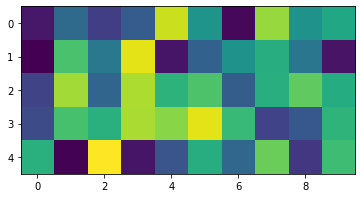

In [56]:
plt.imshow(fc_model.state_dict()['linear_with_tanh.0.weight'])

In [57]:
from torch.utils.data import DataLoader

In [58]:
from torch.utils.data import Dataset

In [59]:
source_data

,Unnamed: 0,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,week_11,week_12,week_13,week_14,week_15,week_16,week_17,week_18,week_19,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,week_36,week_37,week_38,week_39,week_40,week_41,week_42,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52
0,0,2.291574,2.882838,3.581805,4.013875,1.109924,2.834247,2.625045,2.196884,4.208887,2.969051,2.612068,-0.376098,1.908618,3.836926,2.663204,-0.626714,2.021254,3.705657,3.093035,3.844970,3.439896,2.533093,3.510339,3.099925,0.490431,3.388634,3.491945,3.400492,0.764540,1.094826,2.533686,3.267071,1.795316,3.849209,3.744971,2.358851,1.089519,1.487722,1.955583,2.135717,3.149926,3.182269,1.242250,2.771072,3.778143,3.161634,3.792645,2.015481,2.826184,2.520788,2.637210,2.748923
1,1,0.609664,2.523604,2.609537,3.695997,3.399272,2.616612,1.651935,1.348295,3.862523,2.061477,1.306183,3.575652,2.316541,3.561924,2.484761,3.814559,2.900997,1.226450,2.763202,3.797876,2.863672,1.639953,3.053139,3.387866,3.596042,2.562005,3.135175,2.226229,3.430309,3.686614,0.834561,2.305370,2.953097,3.654181,3.375545,0.793245,2.289895,2.588361,1.875832,2.525993,3.194425,1.737970,2.477505,2.284513,3.461783,3.101052,3.442420,1.915776,2.426168,1.662855,2.481925,2.411202
2,2,3.422793,1.812651,-0.097966,1.724064,3.093660,1.781278,2.849946,2.949707,3.560835,2.813926,3.135519,3.737982,1.584471,1.549153,0.789240,3.796965,1.690934,3.656677,2.017728,3.475239,2.022154,2.110546,2.464001,3.224443,3.418570,0.076536,1.949591,1.762427,3.208407,2.963808,3.074211,1.188916,2.281697,3.275575,2.961495,3.273420,2.468088,1.941004,1.287232,0.114734,2.881295,3.176292,2.219667,2.359834,1.932029,2.731947,1.836245,1.219933,1.222740,1.720052,2.169939,2.161702
3,3,3.372283,2.577254,3.854308,3.449679,2.517676,2.635679,2.352706,2.856216,1.948434,1.484706,2.855601,3.453114,2.054693,3.458742,3.272421,3.482986,2.432031,2.867624,2.599266,1.632364,2.815038,-1.035582,2.491935,-1.246636,3.011843,3.757438,3.003546,2.742826,2.798392,2.136432,3.022513,3.161464,0.312703,1.951061,2.180258,3.222229,2.442609,0.360486,2.228689,3.488906,1.458305,2.359314,1.670912,0.909113,3.216652,1.775346,3.270484,2.399709,3.032071,1.703666,1.750585,1.821736
4,4,2.997727,1.799415,3.648090,2.391567,2.376778,1.864717,0.408062,2.346726,3.260303,2.645002,2.238623,1.102055,0.431578,2.591339,3.185047,1.562350,0.698534,1.839974,1.126771,3.388389,1.704621,3.761586,1.371274,4.208887,1.990884,3.584394,1.919142,2.403461,2.041077,2.866074,2.759054,3.039797,3.528095,3.107782,2.681339,2.866172,-0.061723,3.337208,2.257980,3.467202,3.150291,0.368496,2.304058,3.038905,2.038733,2.825186,2.232937,2.509050,2.881796,-1.712131,2.140366,1.926818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15047,15047,1.952726,1.547637,1.902789,0.813261,2.600979,2.910638,2.878396,0.594216,3.526187,3.275296,2.887969,2.025224,2.748022,1.460177,2.616748,2.024982,-1.613387,4.062868,4.043055,3.729286,1.565133,3.535162,2.574310,-1.029810,4.100358,3.895551,3.551926,1.885774,3.301806,2.153504,1.872817,2.536303,2.045246,0.856268,3.053968,3.165155,2.883798,1.204880,3.291762,2.914227,2.286541,2.490362,0.486073,3.336252,3.307270,3.026835,1.472116,3.220792,2.664044,1.546153,3.026948,2.611774
15048,15048,0.652824,3.589191,3.257707,2.821276,2.185937,2.534801,-0.774375,3.835695,3.776809,3.502364,1.502049,3.452802,2.642480,0.891667,3.461389,3.220426,2.736109,2.190288,2.454864,-2.094165,4.178549,4.078991,3.803951,1.568660,3.557223,2.554938,-2.134791,4.340049,4.111419,3.794685,1.851613,3.435770,2.203138,1.873423,2.637667,2.181298,0.092794,3.533286,3.567048,3.255051,1.472761,3.354952,2.684153,1.384912,3.184570,2.832941,2.092033,2.606198,0.753193,3.160599,3.085800,2.814394
15049,15049,3.833707,3.548071,3.1

In [60]:
source_data.values.shape

(15052, 53)

In [61]:
source_data.values

array([[0.00000000e+00, 2.29157429e+00, 2.88283833e+00, ...,
        2.52078778e+00, 2.63721001e+00, 2.74892268e+00],
       [1.00000000e+00, 6.09664112e-01, 2.52360427e+00, ...,
        1.66285479e+00, 2.48192522e+00, 2.41120153e+00],
       [2.00000000e+00, 3.42279275e+00, 1.81265116e+00, ...,
        1.72005177e+00, 2.16993942e+00, 2.16170153e+00],
       ...,
       [1.50490000e+04, 3.83370716e+00, 3.54807088e+00, ...,
        3.03134190e+00, 1.85208859e+00, 3.00563077e+00],
       [1.50500000e+04, 3.18643937e+00, 1.70323164e+00, ...,
        1.19605309e+00, 3.34099104e+00, 2.92155740e+00],
       [1.50510000e+04, 3.10427003e+00, 2.82717086e+00, ...,
        1.33781619e+00, 2.71468770e+00, 2.34349413e+00]])

In [62]:
from icecream import ic

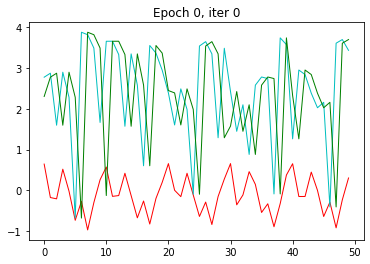

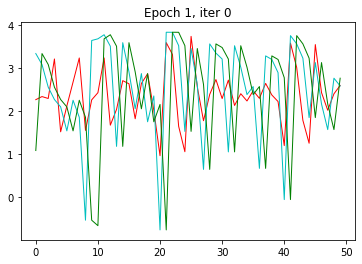

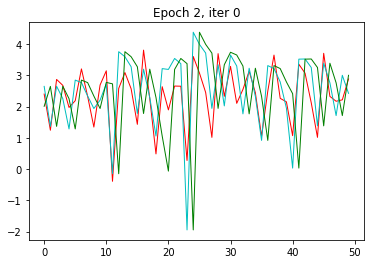

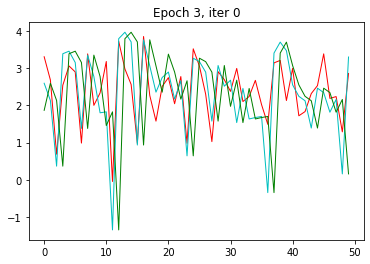

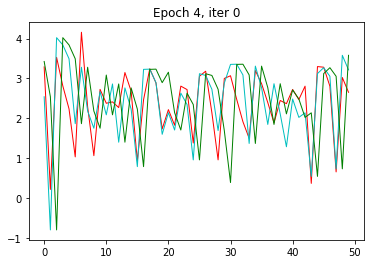

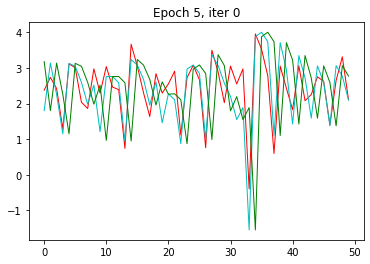

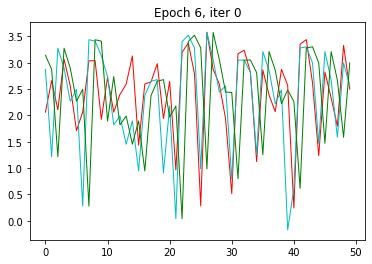

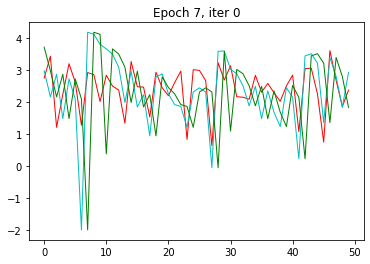

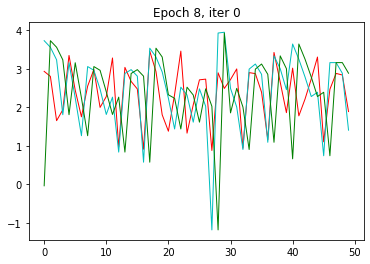

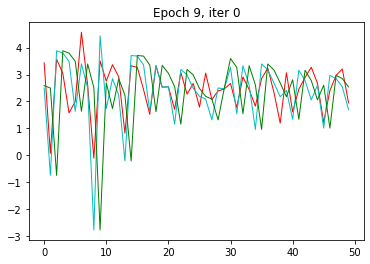

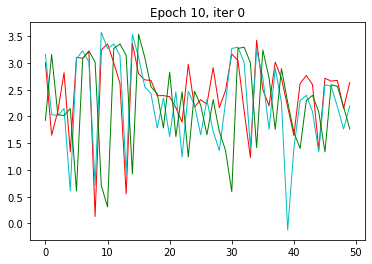

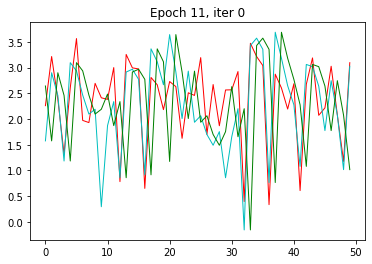

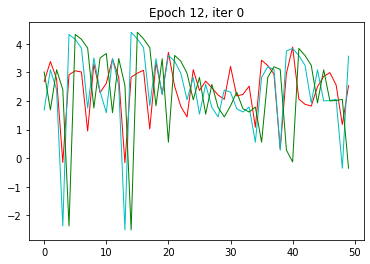

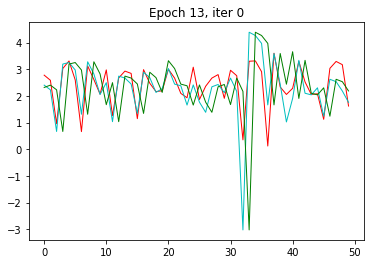

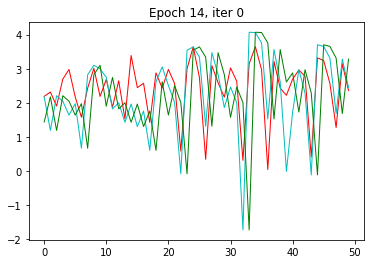

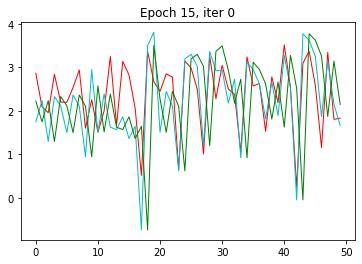

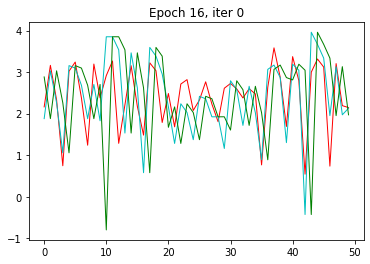

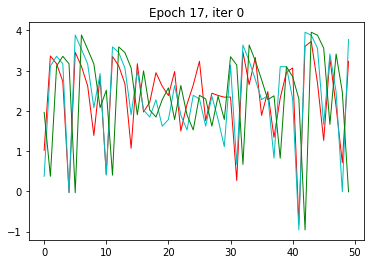

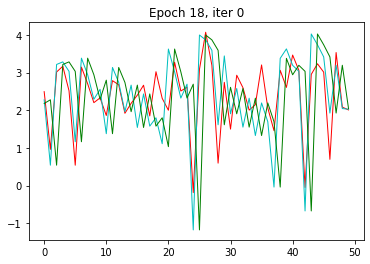

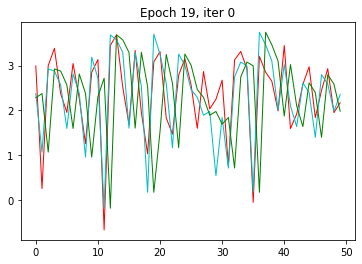

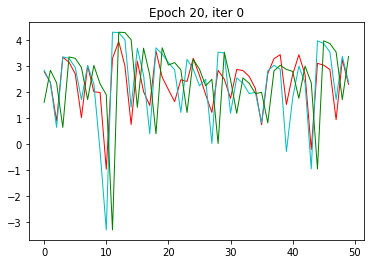

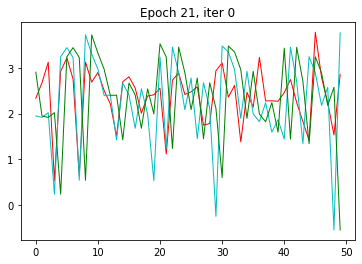

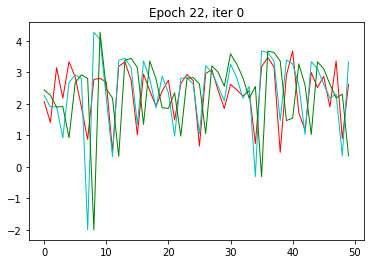

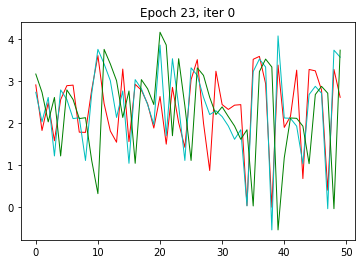

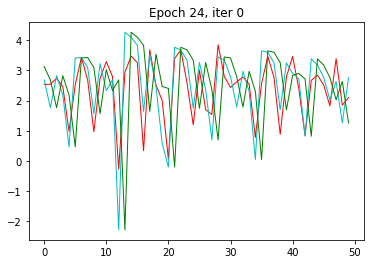

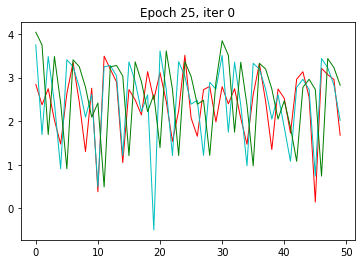

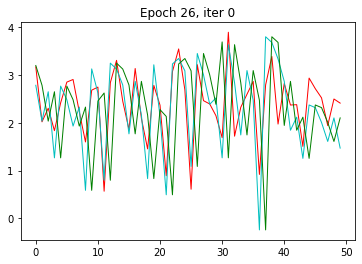

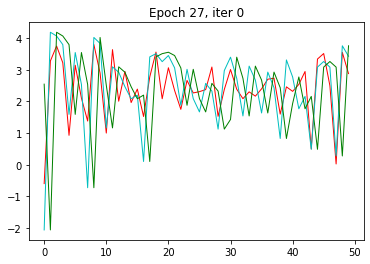

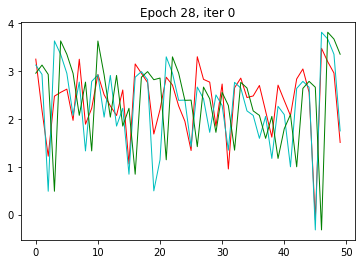

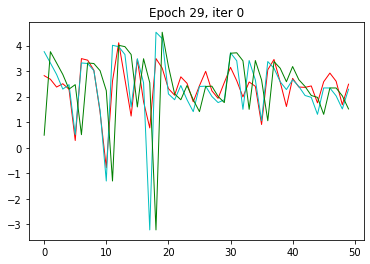

In [63]:
data_loader = torch.utils.data.DataLoader(source_data.values, batch_size=batch_size, shuffle=True)

for epoch in range(n_epochs):
    epoch_losses = []
    for iter_, t in enumerate(data_loader):
        random_index = random.randint(0, t.shape[-1] - seq_length - 1)

        train_x = t[:, random_index: random_index + seq_length]
        train_y = t[:, random_index + 1: random_index + seq_length + 1]

        outputs = fc_model(train_x.double())

        optimizer.zero_grad()
        loss = criterion(outputs, train_y)
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.detach())
        if iter_ == 0:
            plt.clf();
            plt.ion()
            plt.title("Epoch {}, iter {}".format(epoch, iter_))
            plt.plot(torch.flatten(outputs.detach()),'r-',linewidth=1,label='Output')
            plt.plot(torch.flatten(train_y),'c-',linewidth=1,label='Label')
            plt.plot(torch.flatten(train_x),'g-',linewidth=1,label='Input')
            plt.draw();
            plt.pause(0.05);
    fc_losses[epoch] = np.mean(epoch_losses)

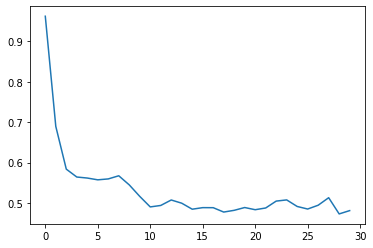

In [64]:
plt.plot(fc_losses)

## RNN model

In [65]:
class SimpleRNN(nn.Module):
    def __init__(self, x_size, hidden_size, n_layers, batch_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.batch_size = batch_size
        #self.inp = nn.Linear(1, hidden_size) 
        self.rnn = nn.RNN(x_size, hidden_size, n_layers, batch_first=True)
        self.out = nn.Linear(hidden_size, output_size) # 

    def forward(self, inputs, hidden=None):
        hidden = self.__init__hidden()
        # print("Forward hidden {}".format(hidden.shape))
        # print("Forward inps {}".format(inputs.shape))
        output, hidden = self.rnn(inputs.float(), hidden.float()) #是一个序列全跑完才有output和hidden
        # print("Out1 {}".format(output.shape))
        output = self.out(output.float());
        # print("Forward outputs {}".format(output.shape))

        return output, hidden

    def __init__hidden(self):
        hidden = torch.zeros(self.n_layers, self.batch_size, self.hidden_size, dtype=torch.float64)
        return hidden

In [66]:
n_epochs = 30
hidden_size = 5 # try to change this parameters 
# hidden_size = 2 # try to change this parameters 
n_layers = 1
batch_size = 5
seq_length = 10
n_sample_size = 50

x_size = 1
output_size = 1

In [67]:
# x_size, hidden_size, n_layers, batch_size, output_size
rnn_model = SimpleRNN(x_size, hidden_size, n_layers, batch_size, output_size)
# rnn_model = SimpleRNN(x_size, hidden_size, n_layers, seq_length, output_size)

In [68]:
criterion = nn.MSELoss()
optimizer = optim.AdamW(rnn_model.parameters(), lr=0.01) # 使用 Adam 优化器 比课上使用的 SGD 优化器更加稳定 

rnn_losses = np.zeros(n_epochs) 

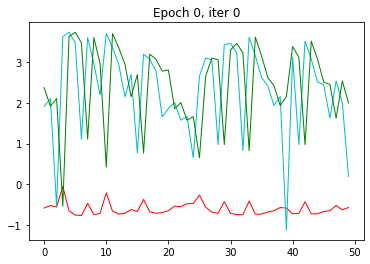

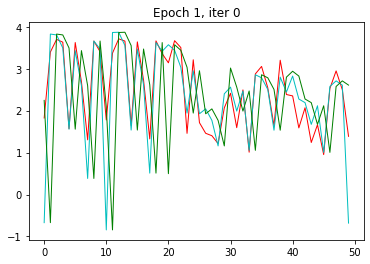

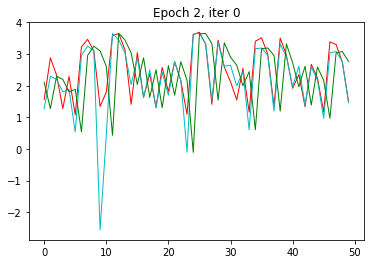

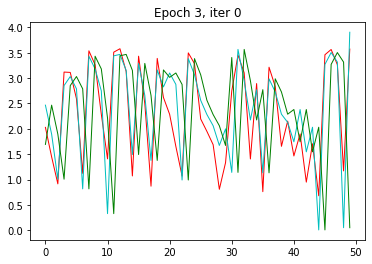

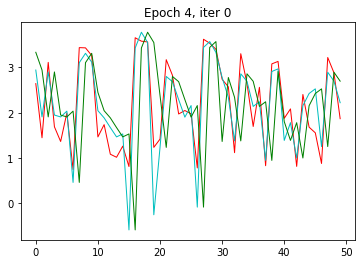

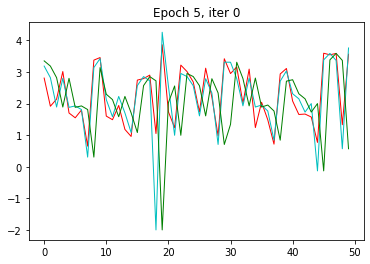

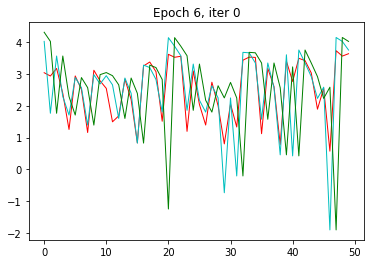

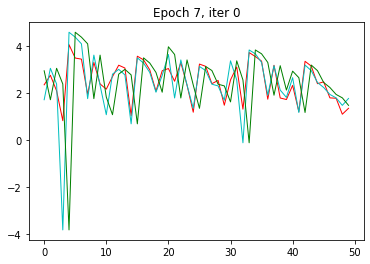

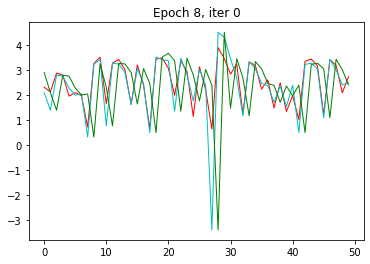

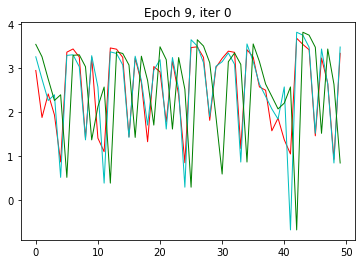

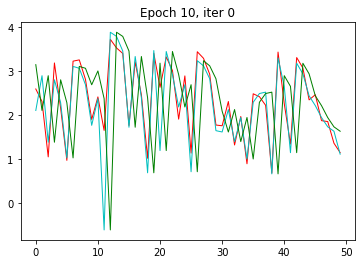

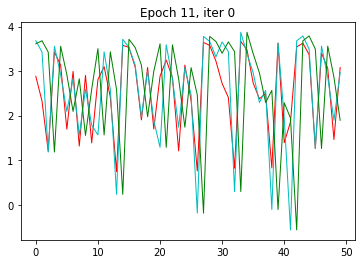

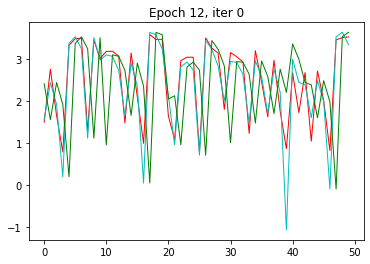

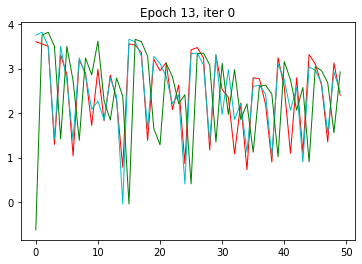

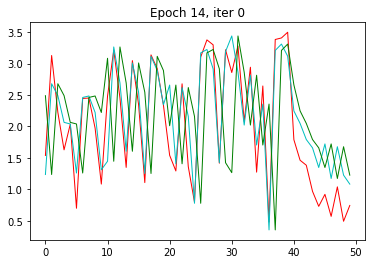

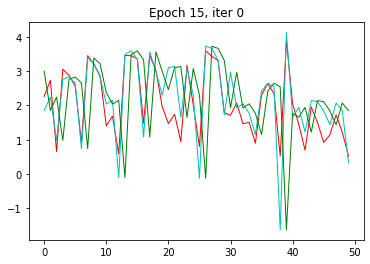

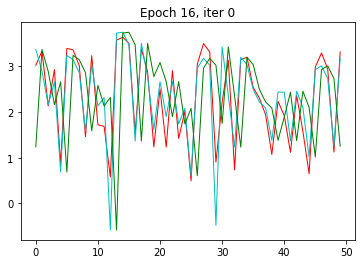

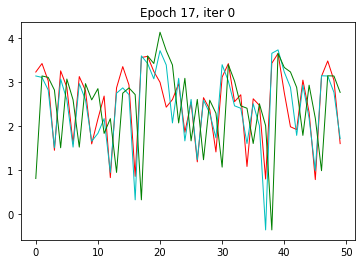

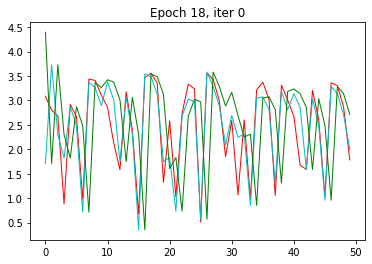

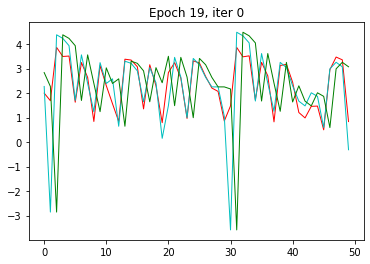

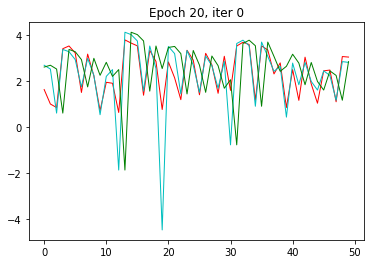

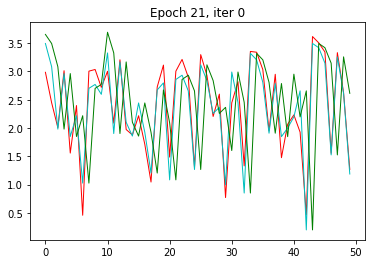

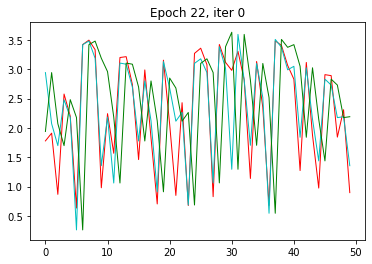

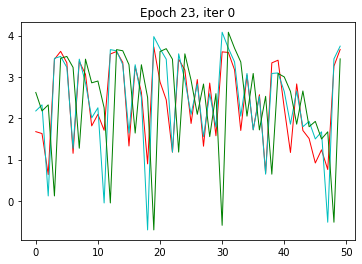

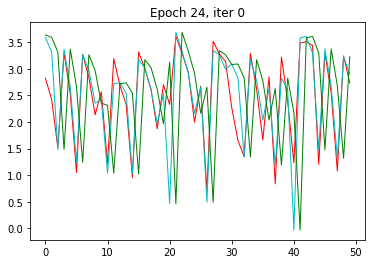

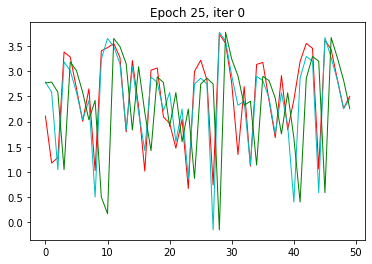

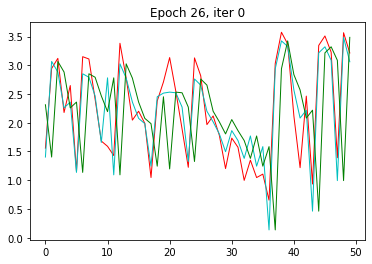

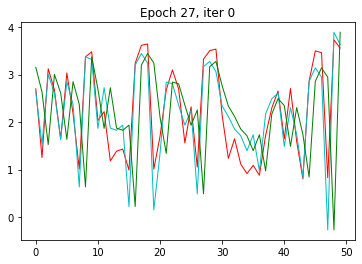

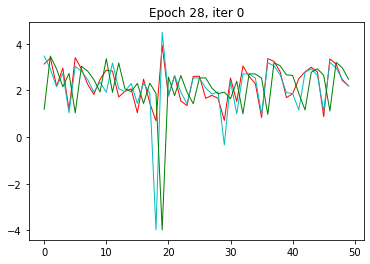

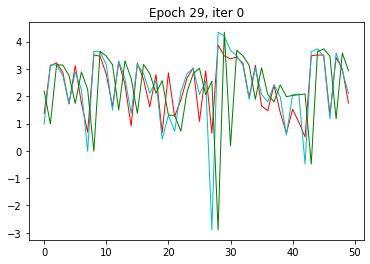

In [69]:
# data_loader = torch.utils.data.DataLoader(source_data.values, batch_size=seq_length, shuffle=True)
data_loader = torch.utils.data.DataLoader(source_data.values, batch_size=batch_size, shuffle=True)

for epoch in range(n_epochs):
    epoch_losses = []
    for iter_, t in enumerate(data_loader):
        if t.shape[0] != batch_size: continue 
        # if t.shape[0] != seq_length: continue 

        random_index = random.randint(0, t.shape[-1] - seq_length - 1)
        train_x = t[:, random_index: random_index+seq_length]
        train_y = t[:, random_index + 1: random_index + seq_length + 1]

        outputs, hidden = rnn_model(train_x.double().unsqueeze(2), hidden_size)

        optimizer.zero_grad()
        loss = criterion(outputs.double(), train_y.double().unsqueeze(2))
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.detach())
        if iter_ == 0:
            plt.clf();
            plt.ion()
            plt.title("Epoch {}, iter {}".format(epoch, iter_))
            plt.plot(torch.flatten(outputs.detach()),'r-',linewidth=1,label='Output')
            plt.plot(torch.flatten(train_y),'c-',linewidth=1,label='Label')
            plt.plot(torch.flatten(train_x),'g-',linewidth=1,label='Input')
            plt.draw();
            plt.pause(0.05);
    rnn_losses[epoch] = np.mean(epoch_losses)

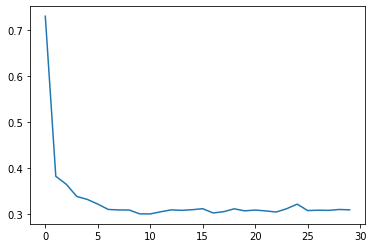

In [70]:
plt.plot(rnn_losses)

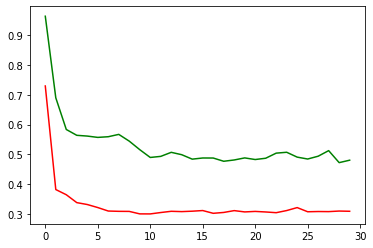

In [71]:
plt.plot(rnn_losses, c='red')
plt.plot(fc_losses, c='green')